In [11]:
import matplotlib.pyplot as plt
import os
import glob
from astar import *
from bfs import *
from ucs import *
from general import searchChar
import tracemalloc
import gc

def inputGrid(file_path):
    with open(file_path, 'r') as file: 
        line = file.readline().strip().split()
        row, col = list(map(int, line))
        
        grid = []
        for _ in range(row): 
            line = file.readline().strip().split()
            grid.append(list(line))
        
        start = searchChar("S", row, col, grid)
        goal = searchChar("G", row, col, grid)

        return row, col, grid, start, goal

In [12]:
rows = []
cols = []
grids = []
starts = []
goals = []
count = 0


dataset_path = os.path.join(os.getcwd(), '../dataset/*.txt') # 2. Ambil semua file yang cocok dengan pola tersebut
file_list = glob.glob(dataset_path) 

for file in file_list:
    row, col, grid, start, goal = inputGrid(file)
    rows.append(row)
    cols.append(col)
    grids.append(grid)
    starts.append(start)
    goals.append(goal)
    count += 1

In [28]:
# ...existing code...
import tracemalloc
import gc

bfs_explored = []
bfs_time = []
bfs_memory = []

UCS_explored = []
UCS_time = []
UCS_memory = []

Astar_explored = []
Astar_time = []
Astar_memory = []

tracemalloc.start()    # start tracer once

for i in range(count):
    gc.collect()
    tracemalloc.reset_peak()
    nExp_BFS, pathCost_BFS, path_BFS, time_BFS, _ = BFS(rows[i], cols[i], grids[i], starts[i], goals[i])
    current, peak = tracemalloc.get_traced_memory()
    bfs_explored.append(nExp_BFS)
    bfs_time.append(time_BFS)
    bfs_memory.append(peak)   # store peak bytes

for i in range(count):
    gc.collect()
    tracemalloc.reset_peak()
    nExp_UCS, pathCost_UCS, path_UCS, time_UCS, _ = UCS(rows[i], cols[i], grids[i], starts[i], goals[i])
    current, peak = tracemalloc.get_traced_memory()
    UCS_explored.append(nExp_UCS)
    UCS_time.append(time_UCS)
    UCS_memory.append(peak)

for i in range(count):
    gc.collect()
    tracemalloc.reset_peak()
    nExp_Astar, pathCost_Astar, path_Astar, time_Astar, _ = astar(rows[i], cols[i], grids[i], starts[i], goals[i])
    current, peak = tracemalloc.get_traced_memory()
    Astar_explored.append(nExp_Astar)
    Astar_time.append(time_Astar)
    Astar_memory.append(peak)

tracemalloc.stop()
# ...existing code...

In [16]:
def visualize(data : list[list[int]], jenisSebaran: str, ylabel):
    fig = plt.figure(figsize =(10, 7))
    plotAxis = fig.add_subplot(111)

    boxplot = plotAxis.boxplot(data, patch_artist = True, notch =False, vert = 1)

    # changing color of boxes
    for patch in boxplot['boxes']:
        patch.set_facecolor('#7cc0d8')

    # changing style of medians
    for median in boxplot['medians']:
        median.set(color ='#134b5f', linewidth = 1.5)

    # # changing style of fliers

    # for flier in boxplot['fliers']:
    #     flier.set(marker ='D',
    #             color ='#0b2d39',
    #             alpha = 0.5)

    plotAxis.set_xticklabels(['BFS', 'UCS', 'A*'])
    
    plt.title(f"Sebaran {jenisSebaran} pada Setiap Algoritma")
    plt.ylabel(f"{ylabel}")  


    plt.show()

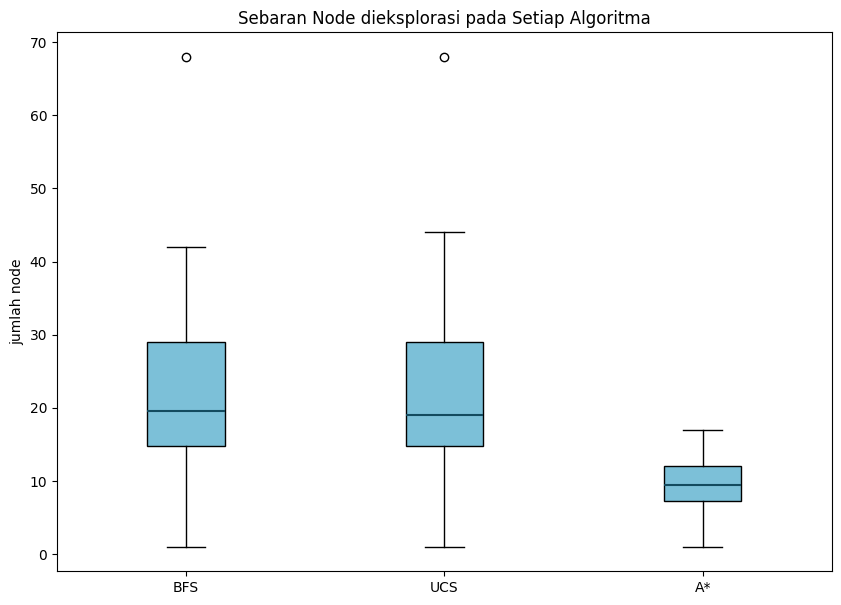

In [41]:
#explored
databfs = bfs_explored.copy()
dataUCS = UCS_explored.copy()
dataAstar = Astar_explored.copy()

databfs.pop(4)
databfs.pop(8)
dataUCS.pop(4)
dataUCS.pop(8)
dataAstar.pop(4)
dataAstar.pop(8)

data = [databfs, dataUCS, dataAstar]
visualize(data, "Node dieksplorasi", "jumlah node")

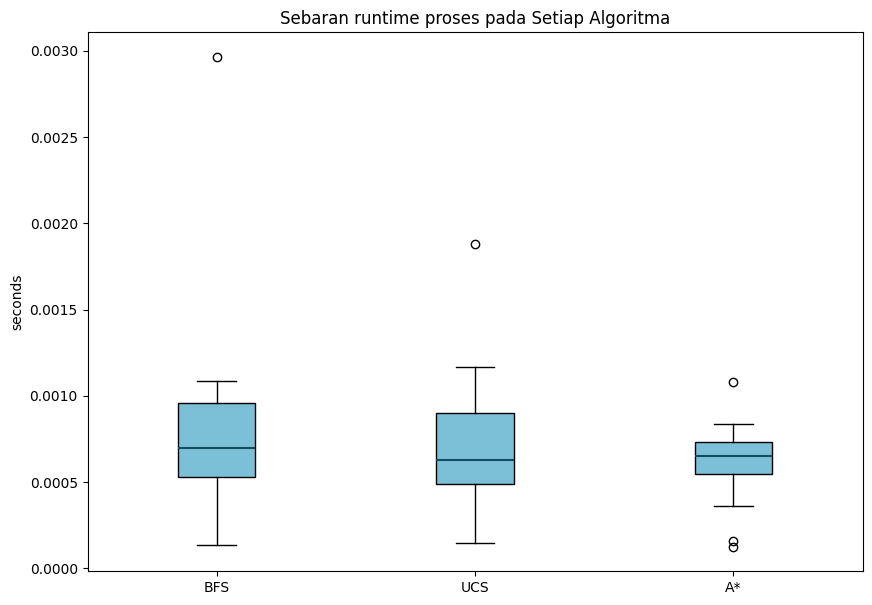

In [42]:
#runtime
databfs = bfs_time.copy()
dataUCS = UCS_time.copy()
dataAstar = Astar_time.copy()

databfs.pop(4)
databfs.pop(8)
dataUCS.pop(4)
dataUCS.pop(8)
dataAstar.pop(4)
dataAstar.pop(8)

data = [databfs, dataUCS, dataAstar]
visualize(data, "runtime proses", "seconds")

In [32]:
print(bfs_memory)
print(UCS_memory)
print(Astar_memory)

[7821, 8648, 7948, 9440, 2574368, 18640, 13172, 11160, 16052, 71942556, 78524, 12496, 7148, 6856]
[10373, 10177, 10133, 11681, 2573329, 20969, 15413, 13345, 18405, 71942901, 79981, 14001, 8781, 8489]
[10067, 11655, 11843, 13247, 340155, 21711, 13235, 12479, 14987, 8119871, 74227, 14407, 10011, 9639]


[7.6376953125, 8.4453125, 7.76171875, 9.21875, 18.203125, 12.86328125, 10.8984375, 15.67578125, 12.203125, 6.98046875, 6.6953125]
[10.1298828125, 9.9384765625, 9.8955078125, 11.4072265625, 20.4775390625, 15.0517578125, 13.0322265625, 17.9736328125, 13.6728515625, 8.5751953125, 8.2900390625]
[9.8310546875, 11.3818359375, 11.5654296875, 12.9365234375, 21.2021484375, 12.9248046875, 12.1865234375, 14.6357421875, 14.0693359375, 9.7763671875, 9.4130859375]


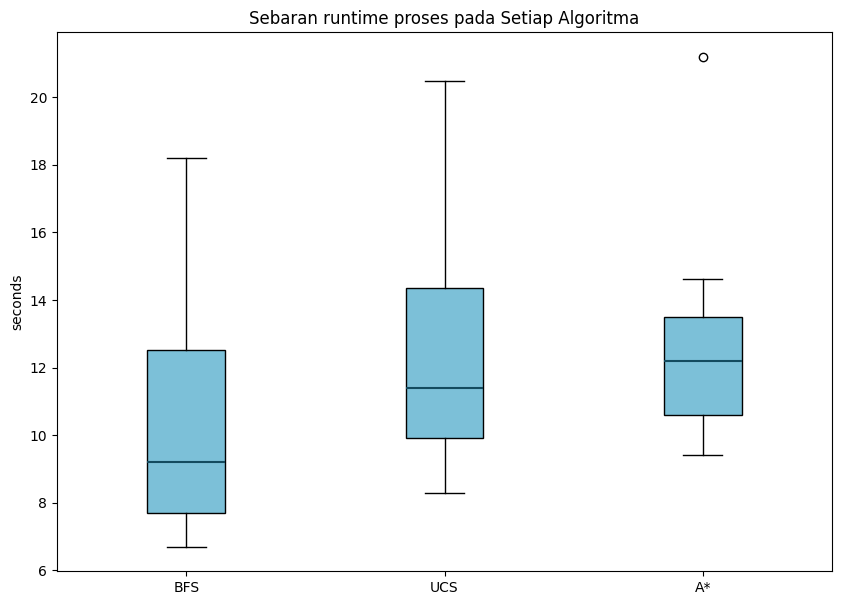

In [45]:
#memory
def bToKb(x): 
    return x / 1024

databfs = bfs_memory.copy()
dataUCS = UCS_memory.copy()
dataAstar = Astar_memory.copy()

databfs = [bToKb(x) for x in bfs_memory]
dataUCS = [bToKb(x) for x in UCS_memory]
dataAstar = [bToKb(x) for x in Astar_memory]

# Hilangin pencilan
databfs.pop(4)
databfs.pop(8)
databfs.pop(8)
dataUCS.pop(4)
dataUCS.pop(8)
dataUCS.pop(8)
dataAstar.pop(4)
dataAstar.pop(8)
dataAstar.pop(8)

print(databfs)
print(dataUCS)
print(dataAstar)

data = [databfs, dataUCS, dataAstar]
visualize(data, "runtime proses", "seconds")